* набор данных минимум 1000 строк, в идеале от 10k
* классика - нормализация, регистр, лемматизация
* векторизация двумя способами count vectorizer/tf-idf vectorizer (допбаллы за добавление биграмм/триграмм)
* построить сеть с обычными линейными(Dense) слоями - для единой структуры сети проверить данные с разными векторами (обучение, проверка на тестовых данных) - с учетом метрики какой способ векторизации оказался более эффективен?
* для лучшей модели построить матрицу путаницы и отчет о классификации (classification report) - сделать выводы о качестве работы классификатора в разрезе классов
* токенизировать нормализованный текст с помощью Tokenizer(Keras) и построить сеть с начальным Embbeding слоем - обучите сеть - лучше она той, что у вас была лучшей при обычной векторизации?
* построить сеть с LSTM слоем - обучить - проверить качество

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy3
import plotly.graph_objs as go

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
work_df = pd.read_excel("data.xlsx")

In [5]:
work_df

,content,sentiment
0,Был ненаход (клад похоронили под слоем бетона)...,1
1,"10/10/10 хорошая прогулка, за хорошим феном. Д...",1
2,"Дома,соточки по всем параметрам,спасибо всей к...",1
3,"Все супер, квест момент, Стафф как надо!",1
4,всё хорошо,1
...,...,...
1195,"Не наход. Магазин сказал ждём минёра, тот так ...",-1
1196,НИ ОДНОГО НАХОДА. 3 РАЗА ВСЕ МИМО. оно и неуди...,-1
1197,"Ненаход, в неочень долгом диспуте магазин и кл...",-1
1198,"Пиздец!!! Это мало говоря. Канавинский р-он, з...",-1


In [6]:
import re

def remove_special_characters_and_numbers(text):
    pattern = re.compile(r'[^А-Яа-я\s]')
    return re.sub(pattern, '', text)

# Применяем функцию к столбцу 'plot' в DataFrame
work_df['norm_text'] = work_df['content'].apply(lambda x: remove_special_characters_and_numbers(str(x)))


In [7]:
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stopwords_eng = set(stopwords.words('english'))

lemm = nltk.WordNetLemmatizer()
text=work_df['norm_text']
norm_text=[]
for s in tqdm(text):
    s1 = re.sub(r'[^\w\s]+|[\d]+', r'',s).strip()
    s1 = s1.lower()
    s1 = word_tokenize(s1) #токенизация
    words=[]
    for i in s1:
        if i not in stopwords_eng:
            words.append(lemm.lemmatize(i))
    sentence=' '.join(words)
    norm_text.append(sentence)

100%|█████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:01<00:00, 870.17it/s]


In [8]:
work_df['norm_text'] = norm_text

In [9]:
work_df.reset_index(drop=True)

,content,sentiment,norm_text
0,Был ненаход (клад похоронили под слоем бетона)...,1,был ненаход клад похоронили под слоем бетона н...
1,"10/10/10 хорошая прогулка, за хорошим феном. Д...",1,хорошая прогулка за хорошим феном до новых встреч
2,"Дома,соточки по всем параметрам,спасибо всей к...",1,домасоточки по всем параметрамспасибо всей ком...
3,"Все супер, квест момент, Стафф как надо!",1,все супер квест момент стафф как надо
4,всё хорошо,1,вс хорошо
...,...,...,...
1195,"Не наход. Магазин сказал ждём минёра, тот так ...",-1,не наход магазин сказал ждм минра тот так на с...
1196,НИ ОДНОГО НАХОДА. 3 РАЗА ВСЕ МИМО. оно и неуди...,-1,ни одного находа раза все мимо оно и неудивите...
1197,"Ненаход, в неочень долгом диспуте магазин и кл...",-1,ненаход в неочень долгом диспуте магазин и кла...
1198,"Пиздец!!! Это мало говоря. Канавинский р-он, з...",-1,пиздец это мало говоря канавинский рон за боло...


In [10]:
russian_stopwords = stopwords.words("russian")
vectorizer1_g = CountVectorizer(max_features=500, min_df=20, max_df=0.7, stop_words=russian_stopwords,ngram_range=(1, 1))
text_cv1_g = vectorizer1_g.fit_transform(work_df['norm_text'])
text_cv1_g = pd.DataFrame(text_cv1_g.toarray(),columns=vectorizer1_g.get_feature_names_out())
text_cv1_g.head()

,берите,брал,брать,буду,быстро,вес,вообще,времени,время,вс,...,товар,топ,точно,фото,хорошее,хотя,хочу,часа,четко,это
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
russian_stopwords = stopwords.words("russian")
vectorizer2_g = CountVectorizer(max_features=500, min_df=1, max_df=0.7, stop_words=russian_stopwords,ngram_range=(2, 2))
text_cv2_g = vectorizer2_g.fit_transform(work_df['norm_text'])
text_cv2_g = pd.DataFrame(text_cv2_g.toarray(),columns=vectorizer2_g.get_feature_names_out())
text_cv2_g.head()

,беру первый,большое спасибо,брал магазине,брать буду,брать магазине,брать позиции,будем пробовать,буду брать,буду диспут,буду открывать,...,часа подьезда,человек который,честно говоря,чтко касание,шаговой доступности,этим магазином,это очень,это первый,это просто,это самый
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
russian_stopwords = stopwords.words("russian")
vectorizer3_g = CountVectorizer(max_features=500, min_df=1, max_df=0.7, stop_words=russian_stopwords,ngram_range=(3, 3))
text_cv3_g = vectorizer3_g.fit_transform(work_df['norm_text'])
text_cv3_g = pd.DataFrame(text_cv3_g.toarray(),columns=vectorizer3_g.get_feature_names_out())
text_cv3_g.head()

,абсолютно клада месте,брать позиции магнитах,буду диспут открывать,буду открывать тк,валялся разорванный опустошенный,вами приятно иметь,взяв двушку весах,второй ненаход подряд,говорил мол клад,диспут буду открывать,...,страшно очевиднв ожидаемый,темное время суток,точка клада просто,трата времени денег,цао рядом цао,четвертой попытки нашли,шкурное квадрате сама,этим магазином ненаход,это первый ненаход,это читаешь знай
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_full_cv = pd.concat([text_cv1_g,text_cv2_g,text_cv3_g],axis=1)
df_full_cv.shape

(1200, 1104)

In [14]:
df_full_cv

,берите,брал,брать,буду,быстро,вес,вообще,времени,время,вс,...,страшно очевиднв ожидаемый,темное время суток,точка клада просто,трата времени денег,цао рядом цао,четвертой попытки нашли,шкурное квадрате сама,этим магазином ненаход,это первый ненаход,это читаешь знай
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
vectorizer_tfidf_1g = TfidfVectorizer(max_features=500, min_df=20, max_df=0.7, stop_words=russian_stopwords, ngram_range=(1, 1))
text_tfidf_1g = vectorizer_tfidf_1g.fit_transform(work_df['norm_text'])
text_tfidf_1g = pd.DataFrame(text_tfidf_1g.toarray(),columns=vectorizer_tfidf_1g.get_feature_names_out())
text_tfidf_1g.head()

,берите,брал,брать,буду,быстро,вес,вообще,времени,время,вс,...,товар,топ,точно,фото,хорошее,хотя,хочу,часа,четко,это
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
vectorizer_tfidf_2g = TfidfVectorizer(max_features=500, min_df=1, max_df=0.7, stop_words=russian_stopwords, ngram_range=(2, 2))
text_tfidf_2g = vectorizer_tfidf_2g.fit_transform(work_df['norm_text'])
text_tfidf_2g = pd.DataFrame(text_tfidf_2g.toarray(),columns=vectorizer_tfidf_2g.get_feature_names_out())
text_tfidf_2g.head()

,беру первый,большое спасибо,брал магазине,брать буду,брать магазине,брать позиции,будем пробовать,буду брать,буду диспут,буду открывать,...,часа подьезда,человек который,честно говоря,чтко касание,шаговой доступности,этим магазином,это очень,это первый,это просто,это самый
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
vectorizer_tfidf_3g = TfidfVectorizer(max_features=500, min_df=1, max_df=0.7, stop_words=russian_stopwords, ngram_range=(3, 3))
text_tfidf_3g = vectorizer_tfidf_3g.fit_transform(work_df['norm_text'])
text_tfidf_3g = pd.DataFrame(text_tfidf_3g.toarray(),columns=vectorizer_tfidf_3g.get_feature_names_out())
text_tfidf_3g.head()

,абсолютно клада месте,брать позиции магнитах,буду диспут открывать,буду открывать тк,валялся разорванный опустошенный,вами приятно иметь,взяв двушку весах,второй ненаход подряд,говорил мол клад,диспут буду открывать,...,страшно очевиднв ожидаемый,темное время суток,точка клада просто,трата времени денег,цао рядом цао,четвертой попытки нашли,шкурное квадрате сама,этим магазином ненаход,это первый ненаход,это читаешь знай
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df_full_tf = pd.concat([text_tfidf_1g,text_tfidf_2g,text_tfidf_3g],axis=1)
df_full_tf.shape

(1200, 1104)

In [19]:
df_full_tf

,берите,брал,брать,буду,быстро,вес,вообще,времени,время,вс,...,страшно очевиднв ожидаемый,темное время суток,точка клада просто,трата времени денег,цао рядом цао,четвертой попытки нашли,шкурное квадрате сама,этим магазином ненаход,это первый ненаход,это читаешь знай
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [22]:
scal_X_cv = StandardScaler().fit_transform(df_full_cv)
scal_X_cv = pd.DataFrame(scal_X_cv, columns=df_full_cv.columns)

In [23]:
encoder = LabelEncoder()
y_label = encoder.fit_transform(work_df['sentiment'])
y = to_categorical(y_label)

In [24]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [186]:
X_train_full,X_test,y_train_full,y_test = train_test_split(scal_X_cv,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [187]:
model = keras.models.Sequential()
model.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

history=model.fit(X_train, y_train, epochs =10,batch_size=128,validation_data=(X_valid,y_valid))

acc=model.evaluate(X_test,y_test)

Epoch 1/10


C:\Users\vpopv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5428 - loss: 0.7117 - val_accuracy: 0.6771 - val_loss: 0.6818
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8837 - loss: 0.3705 - val_accuracy: 0.7292 - val_loss: 0.6373
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9167 - loss: 0.2114 - val_accuracy: 0.7604 - val_loss: 0.6079
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9306 - loss: 0.1450 - val_accuracy: 0.7865 - val_loss: 0.7202
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9376 - loss: 0.1144 - val_accuracy: 0.7760 - val_loss: 0.7649
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9625 - loss: 0.0887 - val_accuracy: 0.7917 - val_loss: 0.8366
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9400 - loss: 0.0954 - val_accuracy: 0.7969 - val_loss: 0.9315
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9471 - loss: 0.0863 - val_accuracy: 0.7812 - val_loss: 0.9834
Epoch 9/10


In [188]:
X_train_full,X_test,y_train_full,y_test = train_test_split(df_full_tf,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [189]:
model_tf = keras.models.Sequential()
model_tf.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
model_tf.add(Dense(256, activation='relu'))
model_tf.add(Dense(64, activation='relu'))
model_tf.add(Dense(y.shape[1], activation='softmax'))

model_tf.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

history=model_tf.fit(X_train, y_train, epochs =10,batch_size=128,validation_data=(X_valid,y_valid))

acc=model_tf.evaluate(X_test,y_test)

Epoch 1/10


C:\Users\vpopv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5997 - loss: 0.6848 - val_accuracy: 0.7917 - val_loss: 0.6391
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8724 - loss: 0.5943 - val_accuracy: 0.8177 - val_loss: 0.5214
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8928 - loss: 0.4285 - val_accuracy: 0.8385 - val_loss: 0.3815
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9101 - loss: 0.2579 - val_accuracy: 0.8438 - val_loss: 0.3684
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9266 - loss: 0.1716 - val_accuracy: 0.8438 - val_loss: 0.4050
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9348 - loss: 0.1457 - val_accuracy: 0.8490 - val_loss: 0.4381
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9511 - loss: 0.0956 - val_accuracy: 0.8333 - val_loss: 0.4753
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9649 - loss: 0.0750 - val_accuracy: 0.8177 - val_loss: 0.5152
Epoch 9/10


In [190]:
X_train_full,X_test,y_train_full_label,y_test_label = train_test_split(df_full_tf,y_label,test_size=0.2,random_state=0)

In [191]:
y_test_label.shape

(240,)

In [192]:
y_pred = model_tf.predict(X_test)
y_pred = y_pred.argmax(axis=-1)
y_pred

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
      dtype=int64)

In [193]:
y_pred.shape

(240,)

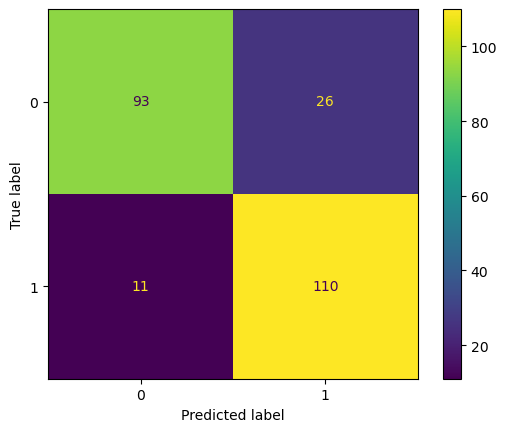

In [194]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_label, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [195]:
from sklearn.metrics import classification_report
print(classification_report(y_test_label,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       119
           1       0.81      0.91      0.86       121

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240



In [199]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [200]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(work_df['norm_text'])

X = tokenizer.texts_to_sequences(work_df['norm_text'])

vocab_size = len(tokenizer.word_index) + 1

In [201]:
vocab_size

7575

In [202]:
print(work_df['norm_text'][0])
print(X[0])

был ненаход клад похоронили под слоем бетона но максимально вежливая поддержка и купончики от магазина порешали все вопросы
[26, 13, 12, 2477, 96, 2478, 1529, 7, 702, 1530, 703, 3, 2479, 36, 84, 2480, 6, 856]


In [203]:
from keras.utils import pad_sequences
maxlen = 250

X = pad_sequences(X, padding='post', maxlen=maxlen)

print(X[0, :])

[  26   13   12 2477   96 2478 1529    7  702 1530  703    3 2479   36
   84 2480    6  856    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [204]:
from keras import layers

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_shape=(maxlen,)))
model.add(layers.Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])
model.summary()

C:\Users\vpopv\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 250, 100)            │         757,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 50)                  │       1,250,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,007,652 (7.66 MB)

 Trainable params: 2,007,652 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [205]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [206]:
history=model.fit(X_train, y_train, epochs =5,batch_size=128,validation_data=(X_valid,y_valid))

acc=model.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.5033 - loss: 0.9316 - val_accuracy: 0.5208 - val_loss: 0.6827
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5181 - loss: 0.6706 - val_accuracy: 0.5156 - val_loss: 0.6640
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7502 - loss: 0.5694 - val_accuracy: 0.6667 - val_loss: 0.5979
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8834 - loss: 0.4320 - val_accuracy: 0.7760 - val_loss: 0.4994
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9439 - loss: 0.2785 - val_accuracy: 0.8385 - val_loss: 0.4214
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8585 - loss: 0.3688 
0.83


In [216]:
from keras import layers
from tensorflow.keras.layers import LSTM

embedding_dim = 100

modelLSTM = Sequential()
modelLSTM.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_shape=(maxlen,)))

modelLSTM.add(layers.LSTM(128))
modelLSTM.add(layers.Dense(y.shape[1], activation='softmax'))

modelLSTM.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])
modelLSTM.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 250, 100)            │         757,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875,006 (3.34 MB)

 Trainable params: 875,006 (3.34 MB)

 Non-trainable params: 0 (0.00 B)

In [217]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [218]:
history=modelLSTM.fit(X_train, y_train, epochs =10,batch_size=5,validation_data=(X_valid,y_valid))

acc=modelLSTM.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.4796 - loss: 0.6996 - val_accuracy: 0.5208 - val_loss: 0.6931
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.4873 - loss: 0.6941 - val_accuracy: 0.4792 - val_loss: 0.6938
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.5113 - loss: 0.6929 - val_accuracy: 0.5208 - val_loss: 0.6930
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.5152 - loss: 0.6936 - val_accuracy: 0.4792 - val_loss: 0.6947
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.4839 - loss: 0.6940 - val_accuracy: 0.4792 - val_loss: 0.6936
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.5236 - loss: 0.6927 - val_accuracy: 0.4792 - val_loss: 0.6932
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.4588 - loss: 0.6928 - val_accuracy: 0.4792 - val_loss: 0.6950
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.5317 - loss: 0.6925 - 